In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df = pd.read_csv('cardekho_data.csv')
print(f'Dataset size is: {len(df)} Rows, {len(df.columns)} Columns')
print(f'Columns are:{df.columns}')

Dataset size is: 301 Rows, 9 Columns
Columns are:Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')


In [3]:
columns = ['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']
df = df[columns]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [4]:
df = df.drop(['Car_Name','Seller_Type','Owner'], axis = 1)

In [5]:
encode = ['Fuel_Type', 'Transmission']
label_encoder = LabelEncoder()
for col in encode:
    df[col] = label_encoder.fit_transform(df[col])
df

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Transmission
0,2014,3.35,5.59,27000,2,1
1,2013,4.75,9.54,43000,1,1
2,2017,7.25,9.85,6900,2,1
3,2011,2.85,4.15,5200,2,1
4,2014,4.60,6.87,42450,1,1
...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,1,1
297,2015,4.00,5.90,60000,2,1
298,2009,3.35,11.00,87934,2,1
299,2017,11.50,12.50,9000,1,1


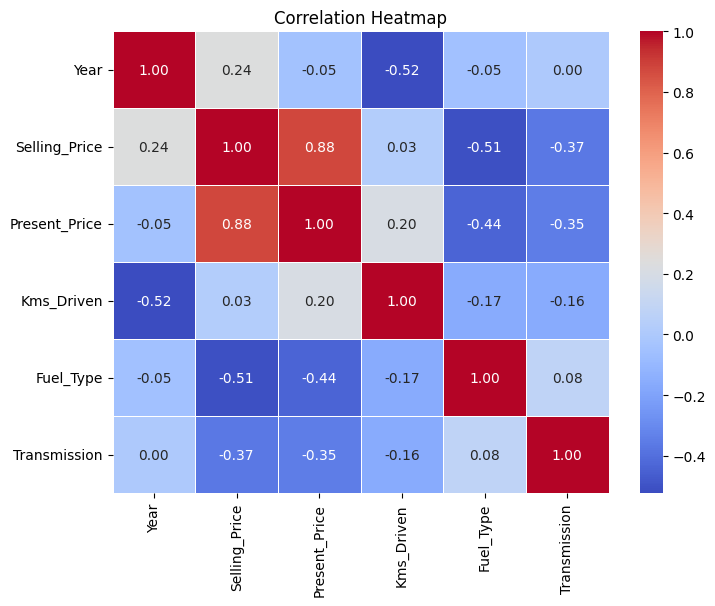

In [6]:
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

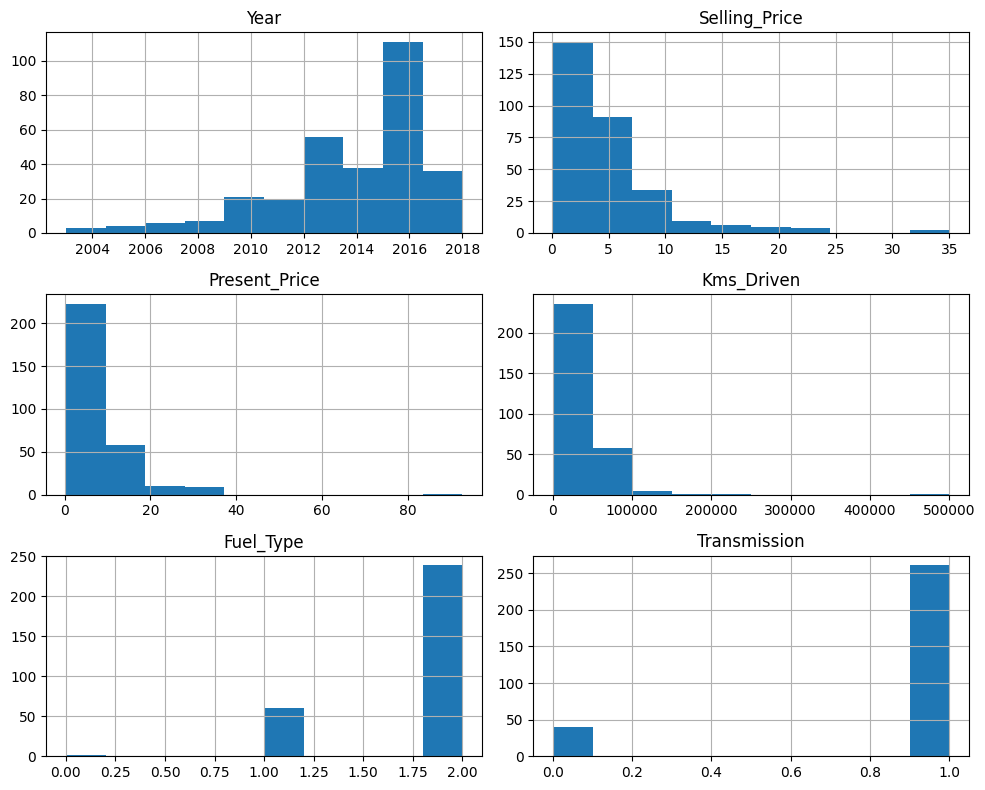

In [7]:
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

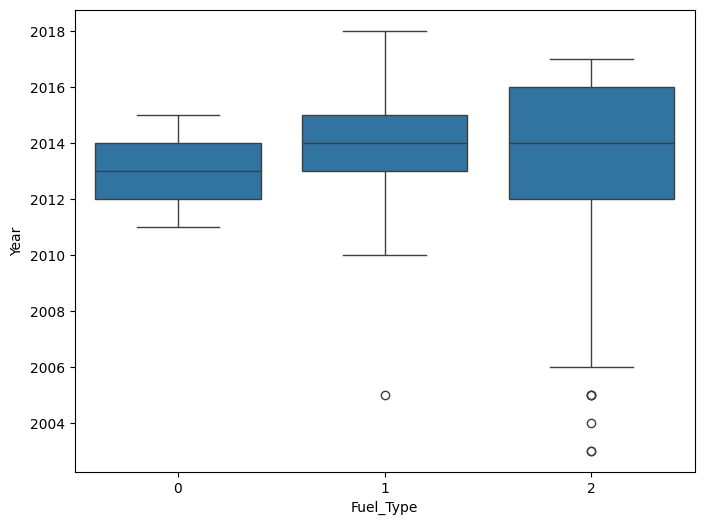

In [8]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Fuel_Type', y='Year', data=df)
plt.xlabel('Fuel_Type')
plt.ylabel('Year')
plt.show()

In [9]:
columns_to_normalize = ['Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Transmission']
scaler = MinMaxScaler()
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])
df

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Transmission
0,2014,0.093123,0.057109,0.053053,1.0,1.0
1,2013,0.133238,0.099913,0.085085,0.5,1.0
2,2017,0.204871,0.103273,0.012813,1.0,1.0
3,2011,0.078797,0.041504,0.009409,1.0,1.0
4,2014,0.128940,0.070980,0.083984,0.5,1.0
...,...,...,...,...,...,...
296,2016,0.269341,0.122237,0.067043,0.5,1.0
297,2015,0.111748,0.060468,0.119119,1.0,1.0
298,2009,0.093123,0.115735,0.175043,1.0,1.0
299,2017,0.326648,0.131990,0.017017,0.5,1.0


In [10]:
features = ['Selling_Price', 'Present_Price', 'Kms_Driven']

X = df[features]
y = df['Year']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [11]:
for n in [5, 15, 25, 50, 150]:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy:{accuracy}, for {n} nearest neighbours')

Accuracy:0.2786885245901639, for 5 nearest neighbours
Accuracy:0.39344262295081966, for 15 nearest neighbours
Accuracy:0.2786885245901639, for 25 nearest neighbours
Accuracy:0.26229508196721313, for 50 nearest neighbours
Accuracy:0.26229508196721313, for 150 nearest neighbours


In [12]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

y_pred = decision_tree.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.26229508196721313


In [13]:
sampled_df = df.sample(frac=1)
sampled_X = sampled_df[features]
sampled_y = sampled_df['Year']

sampled_X_train, sampled_X_test, sampled_y_train, sampled_y_test = train_test_split(sampled_X, sampled_y, test_size=0.2)

#set(sampled_y)

In [14]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1, 10], 'kernel': ['rbf']}

svm_classifier = SVC(random_state=40)

grid_search = GridSearchCV(svm_classifier, param_grid, scoring='accuracy')

grid_search.fit(sampled_X_train, sampled_y_train)

print("Best Hyperparameters:")
print(grid_search.best_params_)

best_svm_classifier = grid_search.best_estimator_
sampled_y_pred = best_svm_classifier.predict(sampled_X_test)

accuracy = accuracy_score(sampled_y_test, sampled_y_pred)
print('Accuracy:', accuracy)

C:\Users\Art\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best Hyperparameters:
{'C': 10, 'gamma': 10, 'kernel': 'rbf'}
Accuracy: 0.26229508196721313


In [15]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.32786885245901637


In [16]:
adaboost_classifier = AdaBoostClassifier()
adaboost_classifier.fit(X_train, y_train)
y_pred = adaboost_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.3114754098360656


In [18]:
svm_classifier = SVC(C=10, gamma=10, kernel='rbf')
svm_classifier.fit(sampled_X_train, sampled_y_train)

y_pred = svm_classifier.predict(sampled_X_test)

print("Classification Report:")
print(classification_report(sampled_y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(sampled_y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

        2003       0.00      0.00      0.00         1
        2005       0.00      0.00      0.00         1
        2006       0.00      0.00      0.00         0
        2008       0.00      0.00      0.00         1
        2009       0.00      0.00      0.00         0
        2010       0.00      0.00      0.00         4
        2011       0.00      0.00      0.00         5
        2012       0.00      0.00      0.00         4
        2013       0.12      0.14      0.13         7
        2014       0.00      0.00      0.00         6
        2015       0.32      0.60      0.41        10
        2016       0.29      0.73      0.41        11
        2017       1.00      0.09      0.17        11

    accuracy                           0.26        61
   macro avg       0.13      0.12      0.09        61
weighted avg       0.30      0.26      0.19        61

Confusion Matrix:
[[0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0

C:\Users\Art\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Art\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Art\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMet